In [28]:
import numpy as np
import pandas as pd

In [29]:
df = pd.read_csv('Students Annual Score in History geography subject.csv')
df.shape

(634, 10)

In [30]:
df.head()

,Gender,Test_01,Exam_01,Test_02,Exam_02,Test_03,Exam_03,Annual_Score,Success,Unnamed: 9
0,F,72.50,93.75,81.25,86.25,100.0,86.25,87.36,1,NaN
1,F,68.75,81.25,65.00,56.25,90.0,71.25,71.25,1,NaN
2,F,67.50,58.75,42.50,45.00,85.0,50.00,55.83,1,NaN
3,F,58.75,87.50,75.00,76.25,100.0,81.25,80.42,1,NaN
4,F,90.00,83.75,70.00,93.75,90.0,88.75,86.94,1,NaN


In [31]:
cdf=df[['Test_01','Exam_01','Test_02','Exam_02','Test_03','Exam_03','Annual_Score']]

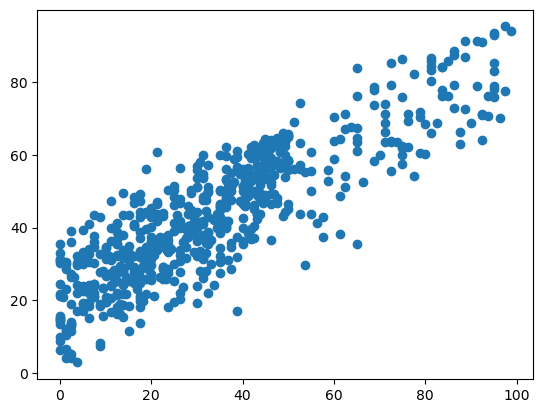

In [32]:
import  matplotlib.pyplot as plt
plt.scatter(cdf.Exam_03,cdf.Annual_Score)
plt.show()

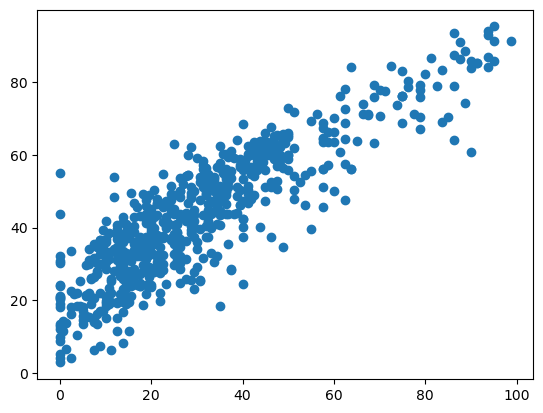

In [33]:
import  matplotlib.pyplot as plt
plt.scatter(cdf.Exam_02,cdf.Annual_Score)
plt.show()

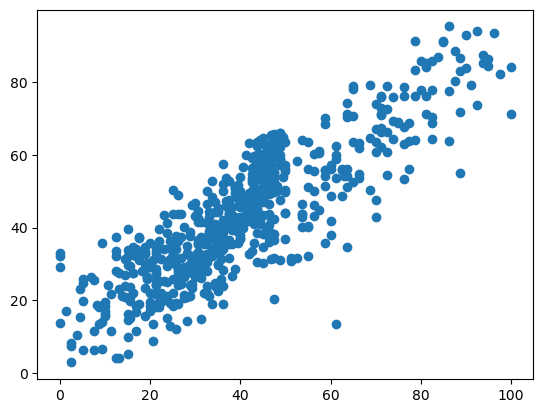

In [34]:
import  matplotlib.pyplot as plt
plt.scatter(cdf.Exam_01,cdf.Annual_Score)
plt.show()

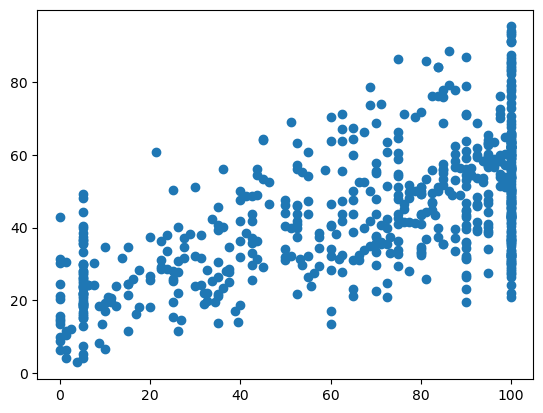

In [35]:
import  matplotlib.pyplot as plt
plt.scatter(cdf.Test_03,cdf.Annual_Score)
plt.show()

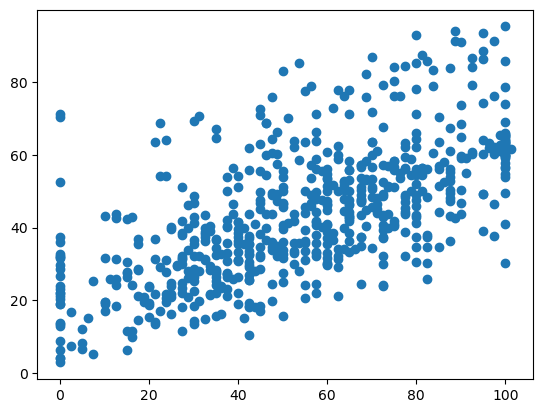

In [36]:
import  matplotlib.pyplot as plt
plt.scatter(cdf.Test_02,cdf.Annual_Score)
plt.show()

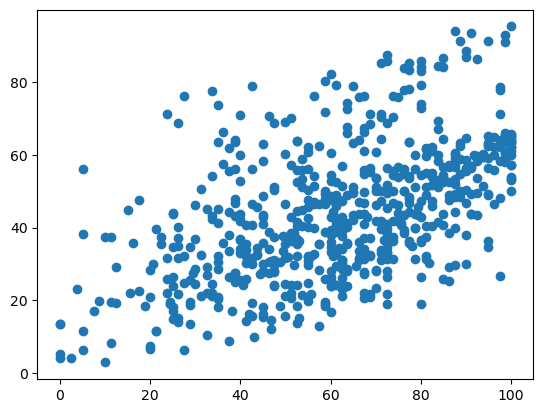

In [37]:
import  matplotlib.pyplot as plt
plt.scatter(cdf.Test_01,cdf.Annual_Score)
plt.show()

In [38]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [39]:
x=np.asanyarray(train[['Exam_01','Exam_02','Exam_03']])
y=np.asanyarray(train[['Annual_Score']])

In [40]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[0.27638638 0.35427876 0.23737943]]


In [41]:
y_hat=regr.predict(test[['Exam_01','Exam_02','Exam_03']])
x=np.asanyarray(test[['Exam_01','Exam_02','Exam_03']])
y=np.asanyarray(test[['Annual_Score']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 38.21
Variance score: 0.88


/home/iliya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Now lets see what will happen when we give the Test grades instead #current accuracy 87%

In [42]:
x=np.asanyarray(train[['Test_01','Test_02','Test_03']])
y=np.asanyarray(train[['Annual_Score']])

In [43]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[0.21845421 0.21434262 0.21169809]]


In [44]:
y_hat=regr.predict(test[['Test_01','Test_02','Test_03']])
x=np.asanyarray(test[['Test_01','Test_02','Test_03']])
y=np.asanyarray(test[['Annual_Score']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 144.98
Variance score: 0.56


/home/iliya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


current accuracy of this model was between 50% to 65% now lets feed the whole data to the model

In [45]:
x=np.asanyarray(train[['Test_01','Exam_01','Test_02','Exam_02','Test_03','Exam_03']])
y=np.asanyarray(train[['Annual_Score']])

In [46]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[0.11111702 0.22222025 0.11110594 0.22221075 0.11110815 0.22223259]]


In [47]:
y_hat=regr.predict(test[['Test_01','Exam_01','Test_02','Exam_02','Test_03','Exam_03']])
x=np.asanyarray(test[['Test_01','Exam_01','Test_02','Exam_02','Test_03','Exam_03']])
y=np.asanyarray(test[['Annual_Score']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.00
Variance score: 1.00


/home/iliya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


we have 100% accuracy on training and test dataset so this shows overfitting

the accuracy is 100 because the annual_grade is calculated using #Annual score = ((test_01 + test_02 + test_03) + 2*(exam_01 + exam_02 + exam_03))/9